In [2]:
import os
import imghdr
import cv2
import tensorflow as tf
import numpy as np

/var/folders/my/hf47wzvn4bl8n2m_tgkx60j40000gn/T/ipykernel_13686/29834172.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
dir_path = 'data_dog'
img_ext = ['jpeg', 'jpg', 'png', 'BMP']

In [4]:
for image_class in os.listdir(dir_path):
    for image in os.listdir(os.path.join(dir_path, image_class)):
        path_name = os.path.join(dir_path, image_class, image)
        try:
            img = cv2.imread(path_name)
            tip = imghdr.what(path_name)
            if tip not in img_ext:
                print('Wrong extenstion, removing image')
                os.remove(path_name)
        except Exception as e:
            print('something not good with images')
            os.remove(path_name)



In [5]:
img = cv2.imread(os.path.join(dir_path, 'dogs', 'dog.0.jpg'))
img.shape

(375, 499, 3)

In [6]:
from matplotlib import pyplot as plt

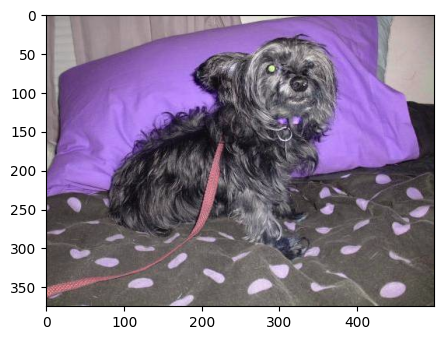

In [9]:
fig, ax = plt.subplots(ncols=1, figsize=(5,5))
ax.imshow(img)

In [10]:
import tensorflow as tf

In [11]:
import numpy as np

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data_dog/')

Found 20000 files belonging to 2 classes.


In [13]:
#Data input from custom 
image_paths = []
labels = []

In [14]:
a = 0
for image_class in os.listdir(os.path.join(dir_path)):
    for image in os.listdir(os.path.join(dir_path, image_class)):
        image_paths.append(os.path.join(dir_path, image_class, image))
        labels.append(a)
    a = 1

In [15]:
from tensorflow.keras.preprocessing import image

In [16]:
# dog = 0, cat = 1
def image_extract(path):
    img = image.load_img(path, target_size=(256,256))
    img = image.img_to_array(img)
    img = img/255.0
    return img

In [17]:
images = np.array([image_extract(path) for path in image_paths])

In [18]:
imag = np.array([image_extract(image_paths[0])])

In [40]:
int(len(data)*0.1)

62

In [39]:
#Preparing the data into train, test, valid
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [43]:
#spliting the data
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [44]:
len(test)

62

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D

In [51]:
#build model
def build_model():
    model = Sequential()
    model.add(Conv2D(16, 3, activation='relu', input_shape=(256,256,3)))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(32, 3, activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(16, 3, activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [1]:
model = build_model()
model.summary()

NameError: name 'build_model' is not defined

In [53]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy


In [54]:
m_loss = BinaryCrossentropy()
m_opt = Adam(0.00001)

In [55]:
model.compile(m_opt, m_loss,metrics=['accuracy'])

In [56]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 319s 728ms/step - accuracy: 0.5344 - loss: 2.9663 - val_accuracy: 0.6065 - val_loss: 1.4706
Epoch 2/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 307s 702ms/step - accuracy: 0.6139 - loss: 1.3537 - val_accuracy: 0.6202 - val_loss: 1.2136
Epoch 3/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 345s 789ms/step - accuracy: 0.6534 - loss: 0.9737 - val_accuracy: 0.6428 - val_loss: 1.0093
Epoch 4/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 383s 875ms/step - accuracy: 0.6908 - loss: 0.7901 - val_accuracy: 0.6202 - val_loss: 1.1068
Epoch 5/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 347s 793ms/step - accuracy: 0.7237 - loss: 0.6571 - val_accuracy: 0.6687 - val_loss: 0.8940
Epoch 6/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 290s 664ms/step - accuracy: 0.7651 - loss: 0.5542 - val_accuracy: 0.6668 - val_loss: 0.8866
Epoch 7/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 284s 650ms/step - accuracy: 0.7964 - loss: 0.4668 - val_accuracy: 0.6817 - val_loss: 0.8572
Epoch 8/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 275s 630ms/step - accuracy: 0.8193 -

In [72]:
loss, accuracy = model.evaluate(test)
print(f'loss:{loss}, accuracy:{accuracy}')

62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 167ms/step - accuracy: 0.6985 - loss: 1.0652
loss:1.0771690607070923, accuracy:0.6885080933570862


In [74]:
from tensorflow.keras.layers import BatchNormalization, Dropout
def update_build_model():
    model = Sequential()
    model.add(Conv2D(32, 3, activation='relu', input_shape=(256,256,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(64, 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(128, 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [75]:
model_adv = update_build_model()
model_adv.summary()

/Users/pavan/Code/ml/ml/SIH_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │    29,491,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,585,857 (112.86 MB)

 Trainable params: 29,585,409 (112.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model_adv.compile(m_opt, m_loss)
hist1 = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 314s 719ms/step - accuracy: 0.9962 - loss: 0.0363 - val_accuracy: 0.7040 - val_loss: 1.1750
Epoch 2/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 306s 700ms/step - accuracy: 0.9939 - loss: 0.0385 - val_accuracy: 0.7178 - val_loss: 1.0372
Epoch 3/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 374s 856ms/step - accuracy: 0.9988 - loss: 0.0235 - val_accuracy: 0.7190 - val_loss: 1.0882
Epoch 4/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 365s 835ms/step - accuracy: 0.9992 - loss: 0.0198 - val_accuracy: 0.7207 - val_loss: 1.0860
Epoch 5/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 359s 821ms/step - accuracy: 0.9994 - loss: 0.0182 - val_accuracy: 0.7172 - val_loss: 1.1268
Epoch 6/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 367s 839ms/step - accuracy: 0.9994 - loss: 0.0155 - val_accuracy: 0.7290 - val_loss: 1.1419
Epoch 7/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 374s 856ms/step - accuracy: 0.9998 - loss: 0.0098 - val_accuracy: 0.7220 - val_loss: 1.2113
Epoch 8/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 358s 819ms/step - accuracy: 0.9798 -

In [ ]:
loss_adv, accuracy_adv = model.evaluate(test)
print(f'loss_adv:{loss_adv}, accuracy_adv:{accuracy_adv}')